In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, cluster

from mlxtend.plotting import plot_decision_regions 

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = ["SepalLengthCm", "PetalLengthCm"]

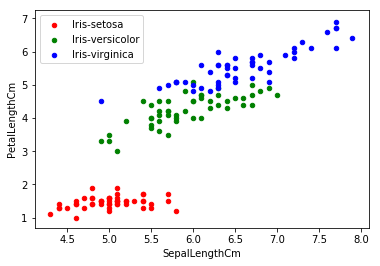

In [4]:
colors = ["red", "green", "blue"]
fig, ax = plt.subplots()
for i, v in enumerate(np.unique(df.Species)):
    df[df.Species == v].plot.scatter(features[0], 
                    features[1], color = colors[i], ax = ax, label = v)
plt.legend()

In [19]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.Species)

In [8]:
X = df[features]
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

In [9]:
kmeans = cluster.KMeans(n_clusters=3, max_iter=100, random_state=1)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [10]:

kmeans.cluster_centers_

array([[ 0.03665519,  0.41727267],
       [-1.01511749, -1.22859407],
       [ 1.22961906,  1.02857275]])

In [11]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[ 5.87358491,  4.49245283],
       [ 5.00555556,  1.59814815],
       [ 6.85813953,  5.56744186]])

In [12]:
y_cluster = kmeans.predict(X_std)

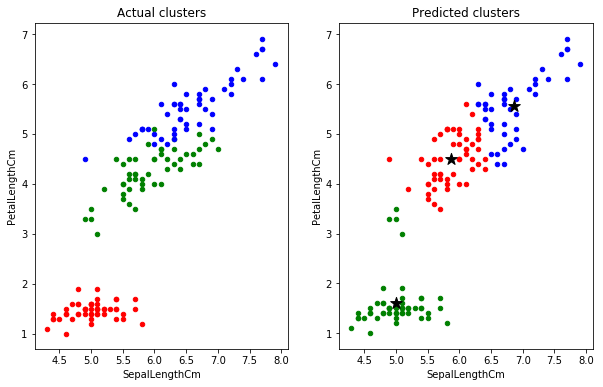

In [25]:
fig, _ = plt.subplots(1, 2, figsize = (10, 6))

colors = ["red", "green", "blue"]
ax = fig.axes[0]
for i, v in enumerate(np.unique(df.Species)):
    df[df.Species == v].plot.scatter(features[0], 
                    features[1], color = colors[i], ax = ax)
ax.set_title("Actual clusters")

ax = fig.axes[1]
colors = ["red", "green", "blue"]
for i, v in enumerate(np.unique(y_cluster)):
    df[y_cluster == v].plot.scatter(features[0], 
                    features[1], color = colors[i], ax = ax)
ax.set_title("Predicted clusters")

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centroids[:, 0], centroids[:, 1],  color = "black", marker = "*", s = 150)

In [20]:
metrics.homogeneity_score(y, y_cluster)

0.58262967111958386